# Question

During campus interviews, company XYZ typically evaluates students based on their test scores from the company's assessment, their % of mark, and interview performance. However, moving forward, the company has decided not to interview all students and instead needs to filter candidates before scheduling interviews.

The company possesses historical data that includes test scores, CGPA, and selection outcomes for previous candidates. This data will be utilized to predict whether a new candidate, with a specific test score and CGPA, will be selected for an interview or not.

Data Set: interviewData.csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Interview_Score = pd.read_csv('interviewData.csv', header=None)
Interview_Score.columns = ['Exam Mark', 'test score', 'Selection']
Interview_Score.head()

,Exam Mark,test score,Selection
0,34.623660,78.024693,No
1,30.286711,43.894998,No
2,35.847409,72.902198,No
3,60.182599,86.308552,Yes
4,79.032736,75.344376,Yes


## Exploratory data analysis


**Answer the following:**
* What is your target variable?
> The target variable for this analysis is **Selection**.
* Do you need to encode the target variable (Yes/No)?
> Yes, we have to encode the target variable. This transformation is essential for the model to learn from the data effectively.
* If yes, briefly explain why you need to encode the target variable.
> To prepare the data for training, we need to convert the categorical target variable into a numerical format through encoding.
* Consider the encoding methods: One-hot encoding, Binary encoding, and Label Encoding. Which one do you apply in this case?
> **Label Encoding**, as it is used to represent categorical variables numerically by assigning a distinct numerical label to each category within the variable.
* Explain why you have selected the above encoding method.
> As explained above, the process of label encoding enables the model to interpret and analyze categorical data during training, and is best suited for datasets like the one above.

Read the following article

https://medium.com/@swayampatil7918/exploring-different-encoding-techniques-for-machine-learning-models-b762e3b546db

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
Encoder = LabelBinarizer()
Encoded_labels = Encoder.fit_transform(Interview_Score['Selection'])
Label_classes = list(Encoder.classes_)
Interview_Score['Selection'] = Encoded_labels
Label_map = {0: 'No', 1: 'Yes'}
Interview_Score['Selection'] = [Label_map[value] for value in Interview_Score['Selection']]
print(Label_classes)
display(Interview_Score)

['No', 'Yes']


,Exam Mark,test score,Selection
0,34.623660,78.024693,No
1,30.286711,43.894998,No
2,35.847409,72.902198,No
3,60.182599,86.308552,Yes
4,79.032736,75.344376,Yes
...,...,...,...
95,83.489163,48.380286,Yes
96,42.261701,87.103851,Yes
97,99.315009,68.775409,Yes
98,55.340018,64.931938,Yes


<Axes: xlabel='Exam Mark', ylabel='test score'>

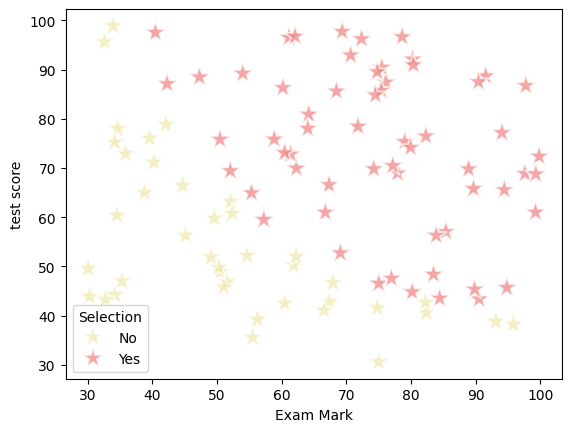

In [7]:
import seaborn as sns
sns.scatterplot(x = 'Exam Mark', y = 'test score', data = Interview_Score, hue = 'Selection',
                palette = {'Yes': 'LightCoral', 'No': 'PaleGoldenrod'}, marker = '*', s = 250, alpha = 0.7)

## Logistic Regression Model

Logistic Regression Model applies the sigmoid to the familiar linear regression model as shown below:

$$ \hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$

  where

  $$g(z) = \frac{1}{1+e^{-z}}$$

that is
$$\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \frac{1}{1+e^{-(\mathbf{w} \cdot \mathbf{x}^{(i)} + b )}}$$

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(x):
    w = np.zeros(x.shape[1])
    b = 0
    z = np.dot(x, w) + b
    y_hat = sigmoid(z)
    return y_hat

### Answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> No. Employing mean squared error (MSE) as the cost function for logistic regression isn't ideal.
* Explain why you said yes or no to the above questions.
> Logistic regression predicts class probabilities, making it a classification algorithm. Hence, it's preferable to choose a cost function that accounts for deviations from the true class labels, rather than the actual values.



### Log Loss/ Sigmoid Cross Entropy for Logistic regression

     


$$ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(\hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - \hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) $$

### Cost function


$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$

### Answer the following


* What is a loss function?
> A loss function evaluates the difference between the model's predictions and the actual target values assigned to an individual data point.
* What is a cost function?
> A cost function serves to compile and assess the collective errors incurred across the entirety of a dataset.
* What is the distinction between them?
> The distinction lies in their scope and purpose. While the loss function evaluates the differences between the predictions and actual values for individual data points, the cost function extends its evaluation across multiple data points, aggregating the individual losses to provide an overall assessment of model performance.

### Derivative of the cost function with respect to weights

Type here the formulas to compute the derivatives of the const function with respect to $w_1$, $w_2$ and b

In [37]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(w, b, x):
    return sigmoid(np.dot(x, w) + b)

def cost_fn(w, b, x, y):
    M, N = x.shape
    loss = np.zeros((M,))
    for i in range(M):
        loss[i] = -y[i] * np.log(predict(w, b, x[i])) - (1 - y[i]) * np.log(1 - predict(w, b, x[i]))
    return np.mean(loss)

In [38]:
def compute_gradient_wb(w, b, x, y):
    M, N = x.shape
    dJ_dw = np.zeros((N,))
    dJ_db = 0
    for i in range(M):
        err = predict(w, b, x[i]) - y[i]
        for j in range(N):
            dJ_dw[j] += err * x[i, j]
        dJ_db += err
    dJ_dw /= M
    dJ_db /= M
    return dJ_dw, dJ_db

### Gradient Descent Algorithm

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [39]:
def gradient_descent(w, b, X_train, X_test, y_train, y_test, alpha, num_iter):
    J_values = [1]
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient_wb(w, b, X_train, y_train)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J_values.append(cost_fn(w, b, X_train, y_train))
        if i % 10 == 0:
            print("Iteration {}: Cost - {:.4f}".format(i, J_values[-1]))
    return w, b

## Model Training

In [41]:
from sklearn.model_selection import train_test_split
X = Interview_Score.iloc[:, :-1].values
y = Interview_Score.iloc[:, -1].values
y = (y == 'Yes').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=None)
np.random.seed(1)
w_ini = np.random.rand(X.shape[1])
b_ini = -9
alpha = 0.001
num_iter = 1000
w, b = gradient_descent(w_ini, b_ini, X_train, X_test, y_train, y_test, alpha, num_iter)
print("Final parameters: w:{}, b:{}".format(w, b))

<ipython-input-37-b2cc10b52d0d>:12: RuntimeWarning: divide by zero encountered in log
  loss[i] = -y[i] * np.log(predict(w, b, x[i])) - (1 - y[i]) * np.log(1 - predict(w, b, x[i]))
<ipython-input-37-b2cc10b52d0d>:12: RuntimeWarning: invalid value encountered in scalar multiply
  loss[i] = -y[i] * np.log(predict(w, b, x[i])) - (1 - y[i]) * np.log(1 - predict(w, b, x[i]))


Iteration 0: Cost - nan
Iteration 10: Cost - nan
Iteration 20: Cost - 2.3823
Iteration 30: Cost - 0.8405
Iteration 40: Cost - 0.5478
Iteration 50: Cost - 0.3795
Iteration 60: Cost - 0.3133
Iteration 70: Cost - 0.2936
Iteration 80: Cost - 0.2884
Iteration 90: Cost - 0.2870
Iteration 100: Cost - 0.2867
Iteration 110: Cost - 0.2866
Iteration 120: Cost - 0.2865
Iteration 130: Cost - 0.2865
Iteration 140: Cost - 0.2865
Iteration 150: Cost - 0.2865
Iteration 160: Cost - 0.2865
Iteration 170: Cost - 0.2865
Iteration 180: Cost - 0.2865
Iteration 190: Cost - 0.2865
Iteration 200: Cost - 0.2865
Iteration 210: Cost - 0.2865
Iteration 220: Cost - 0.2865
Iteration 230: Cost - 0.2865
Iteration 240: Cost - 0.2865
Iteration 250: Cost - 0.2865
Iteration 260: Cost - 0.2865
Iteration 270: Cost - 0.2865
Iteration 280: Cost - 0.2865
Iteration 290: Cost - 0.2865
Iteration 300: Cost - 0.2865
Iteration 310: Cost - 0.2865
Iteration 320: Cost - 0.2865
Iteration 330: Cost - 0.2865
Iteration 340: Cost - 0.2865
It

In [44]:
J_train_values = []
J_test_values = []
def check_loss(w, b, X_train, X_test, y_train, y_test, num_iter):
    for i in range(num_iter):
        J_train = cost_fn(w, b, X_train, y_train)
        J_test = cost_fn(w, b, X_test, y_test)
        J_train_values.append(J_train)
        J_test_values.append(J_test)

check_loss(w, b, X_train, X_test, y_train, y_test, num_iter)

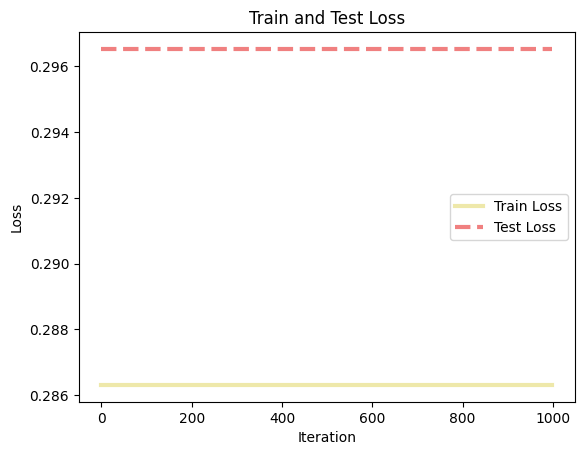

In [47]:
plt.plot(J_train_values, label = 'Train Loss', linestyle = '-', color = 'PaleGoldenrod', linewidth = 3)
plt.plot(J_test_values, label = 'Test Loss', linestyle = '--', color = 'LightCoral', linewidth = 3)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train and Test Loss')
plt.legend()
plt.show()

<ipython-input-80-2c836779476a>:6: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(u, v, logReg, levels=[P], colors = "DarkMagenta", linewidth = 3)


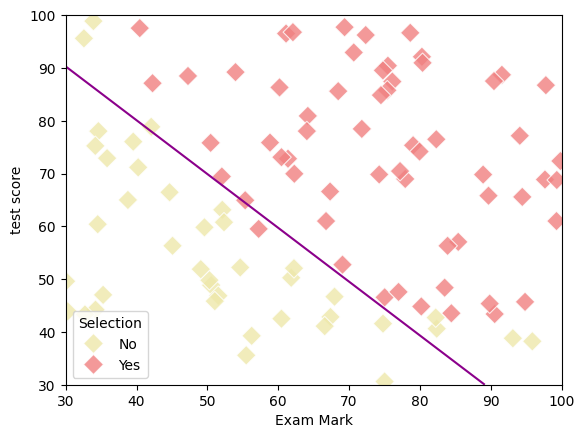

In [80]:
P = 0.5
u = np.linspace(30, 100, 50)
v = np.linspace(30, 100, 50)
X, Y = np.meshgrid(u, v)
logReg = 1 / (1 + np.exp(-(X * w[0] + Y * w[1] + b)))
plt.contour(u, v, logReg, levels=[P], colors = "DarkMagenta", linewidth = 3)
sns.scatterplot(data = Interview_Score, x = 'Exam Mark', y = 'test score', hue = 'Selection',
                marker = 'D', s = 100, alpha = 0.8, palette = {'No': 'PaleGoldenrod', 'Yes': 'LightCoral'})
plt.legend(title='Selection')

### Answer the following


* What does the P value signify in the provided code?
> The P value serves as a critical threshold in logistic regression models, dictating the boundary between two classes. With logistic regression, each data point is assigned a probability score, representing its likelihood of belonging to one of the classes.
* How will altering the P value affect the outcome?
> Changing the P value alters the classification threshold, impacting the balance between sensitivity and specificity in the model. For instance, raising the P value reduces the number of positive classifications, while lowering it increases them, thereby influencing the model's true positive and true negative rates.
* What range of values can P encompass?
> P can take on values between 0 and 1, including both endpoints. This range reflects the spectrum of probabilities, where 0 represents the lowest confidence in a prediction, and 1 represents the highest confidence.
* Describe the importance of the P value in a project aimed at classifying tumors as malignant or benign.
> In tumor classification projects, the choice of the probability threshold (P) is critical. A lower threshold enhances the detection of malignant tumors but elevates the risk of false positives. Conversely, a higher threshold reduces false positives but raises the risk of false negatives. Balancing these trade-offs is vital, ensuring accurate classification while considering the medical implications of misclassification. Thus, selecting the threshold involves minimizing both false positives and false negatives while prioritizing timely treatment for malignant cases.

### Imagine a scenario where a student scores 65 marks in both the Exam and Test. Use your model to predict whether the student will pass the interview or not.

In [109]:
import numpy as np
New_student_scores = np.array([[65,65]])
w_new = np.random.rand(2)
b_new = -9
New_student_scores = New_student_scores.reshape(1, -1)
Prediction = predict(w_new, b_new, New_student_scores)
Binary_prediction = 1 if prediction >= 0.5 else 0
Likelihood_passing = "High" if Prediction >= 0.5 else "Low"
print("Probability of passing the Interview:", Prediction[0])
print("Likelihood of passing the Interview:", Likelihood_passing)
if Binary_prediction == 1:
    print("The student will pass the interview.")
else:
    print("The student will not pass the interview.")

Probability of passing the Interview: 0.9999999997255797
Likelihood of passing the Interview: High
The student will pass the interview.
